In [ ]:
X = list(range(10))
Y = [ 1, 1, 2, 4, 5, 7, 8, 9, 9, 10]
print(len(Y))

print(X)

10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


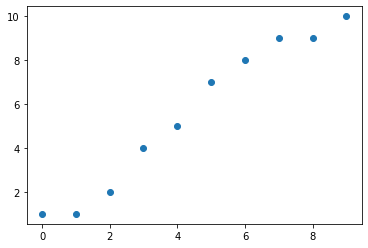

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

In [ ]:
class H():

  def __init__(self, w):
    self.w = w

  def forward(self, x):
    return self.w * x

def cost(h, X, Y) :
  error = 0
  for i in range(len(X)) : 
    error += (h.forward(X[i]) - Y[i])** 2
  error = error / len(X)
  return error

h = H(4)
cost(h, X, Y)


222.2

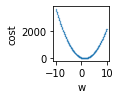

In [ ]:
list_w = []
list_c = []

for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  c = cost(h, X, Y)
  list_w.append(w)
  list_c.append(c)

plt.figure(figsize = (1,1))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)

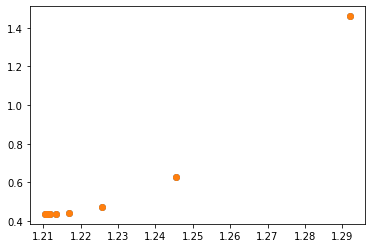

In [ ]:
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, X, Y)
  eps = 0.00001
  h = H(w + eps)
  cost2 = cost(h, X, Y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
  grad = grad / len(X)
  c = cost(h, X, Y)
  return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(10):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_c1.append(mean_cost)
  list_w2.append(w2)
  list_c2.append(mean_cost2)
  # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)
